## 1.6 裂区实验（Split-Plot Experiment）
#### 什么是裂区实验？
- 是一种实验设计，实验单元存在多个层次的分组，不同处理因子被随机分配到不同层次的实验单元。
#### 案例：
- 农田被划分为六个区组（blocks），每个区组有三块地（plots）。每块地又被细分为四个子地块（subplots）。
- 在每个区组内，不同品种被随机分配到各个地块。氮浓度则被随机分配到每块地的子地块中。
- 三层：blocks、plots、subplots
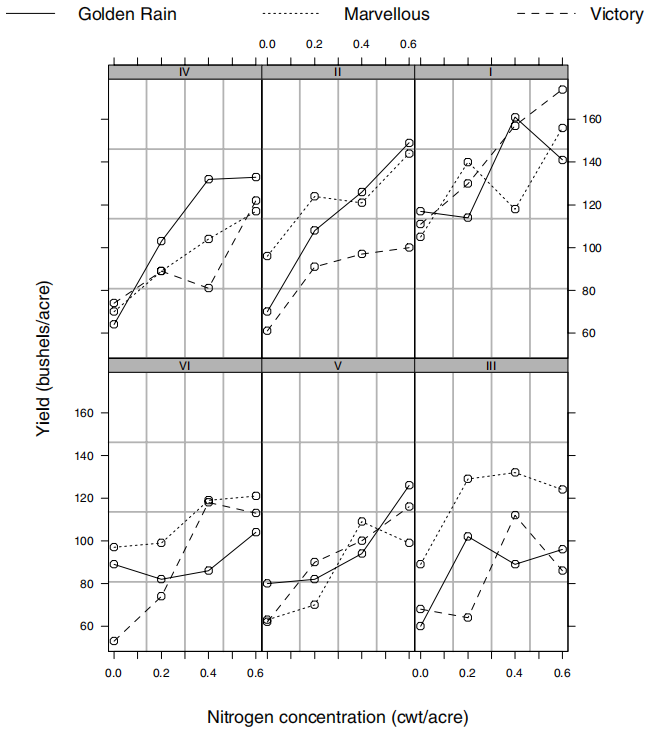

In [2]:
library(nlme)

#### 响应变量：收成
#### 固定效应：
- 氮肥量
- 品种
- 氮肥量*品种
#### 随机效应：
- 假设处理在每个分组层级都是随机分配的，我们可能会倾向于将随机效应与每个层级联系起来。

In [20]:
names(Oats)
# Oats
levels(Oats$Block)

[1] "Block"   "Variety" "nitro"   "yield"

,Block,Variety,nitro,yield
,<ord>,<fct>,<dbl>,<dbl>
1,I,Victory,0.0,111
2,I,Victory,0.2,130
3,I,Victory,0.4,157
4,I,Victory,0.6,174
5,I,Golden Rain,0.0,117
6,I,Golden Rain,0.2,114
7,I,Golden Rain,0.4,161
8,I,Golden Rain,0.6,141
9,I,Marvellous,0.0,105


[1] "VI"  "V"   "III" "IV"  "II"  "I"

In [21]:
fm1Oats <- lme( yield ~ ordered(nitro) * Variety, data = Oats,  random = ~ 1 | Block/Variety )
summary( fm1Oats )

Linear mixed-effects model fit by REML
  Data: Oats 
       AIC      BIC    logLik
  563.1874 594.6026 -266.5937

Random effects:
 Formula: ~1 | Block
        (Intercept)
StdDev:    14.64496

 Formula: ~1 | Variety %in% Block
        (Intercept) Residual
StdDev:    10.29862 13.30728

Fixed effects:  yield ~ ordered(nitro) * Variety 
                                       Value Std.Error DF   t-value p-value
(Intercept)                        104.50000  7.797512 45 13.401711  0.0000
ordered(nitro).L                    33.69009  5.432672 45  6.201385  0.0000
ordered(nitro).Q                    -4.16667  5.432672 45 -0.766964  0.4471
ordered(nitro).C                    -0.81989  5.432672 45 -0.150919  0.8807
VarietyMarvellous                    5.29167  7.078898 10  0.747527  0.4720
VarietyVictory                      -6.87500  7.078898 10 -0.971196  0.3544
ordered(nitro).L:VarietyMarvellous  -4.80755  7.682959 45 -0.625741  0.5346
ordered(nitro).Q:VarietyMarvellous  -1.91667  7.682959 45

In [22]:
anova(fm1Oats)

,numDF,denDF,F-value,p-value
,<int>,<dbl>,<dbl>,<dbl>
(Intercept),1,45,245.1431637,0.000000e+00
ordered(nitro),3,45,37.6855958,2.457812e-12
Variety,2,10,1.4853427,2.723864e-01
ordered(nitro):Variety,6,45,0.3028231,9.321990e-01


#### 去除交互项后

In [4]:
fm2Oats <- update( fm1Oats, yield ~ ordered(nitro) + Variety )
anova( fm2Oats )

,numDF,denDF,F-value,p-value
,<int>,<dbl>,<dbl>,<dbl>
(Intercept),1,51,245.145180,0.000000e+00
ordered(nitro),3,51,41.052772,1.227907e-13
Variety,2,10,1.485338,2.723873e-01


#### 去除品种

In [26]:
fm4Oats <- lme( yield ~ ordered(nitro), data = Oats, random = ~ 1 | Block/Variety )
anova( fm4Oats )

,numDF,denDF,F-value,p-value
,<int>,<dbl>,<dbl>,<dbl>
(Intercept),1,51,245.13818,0.000000e+00
ordered(nitro),3,51,41.05287,1.227907e-13


In [27]:
fm4Oats <- lme( yield ~ nitro, data = Oats, random = ~ 1 | Block/Variety )
anova( fm4Oats )

,numDF,denDF,F-value,p-value
,<int>,<dbl>,<dbl>,<dbl>
(Intercept),1,53,245.1412,0.000000e+00
nitro,1,53,118.0029,4.218847e-15


In [28]:
summary(fm4Oats)

Linear mixed-effects model fit by REML
  Data: Oats 
       AIC      BIC    logLik
  603.0418 614.2842 -296.5209

Random effects:
 Formula: ~1 | Block
        (Intercept)
StdDev:    14.50598

 Formula: ~1 | Variety %in% Block
        (Intercept) Residual
StdDev:    11.00467 12.86696

Fixed effects:  yield ~ nitro 
               Value Std.Error DF  t-value p-value
(Intercept) 81.87222  6.945280 53 11.78818       0
nitro       73.66667  6.781483 53 10.86291       0
 Correlation: 
      (Intr)
nitro -0.293

Standardized Within-Group Residuals:
        Min          Q1         Med          Q3         Max 
-1.74380777 -0.66475224  0.01710434  0.54298790  1.80298914 

Number of Observations: 72
Number of Groups: 
             Block Variety %in% Block 
                 6                 18 

In [6]:
VarCorr( fm4Oats )

            Variance     StdDev  
Block =     pdLogChol(1)         
(Intercept) 210.4235     14.50598
Variety =   pdLogChol(1)         
(Intercept) 121.1029     11.00467
Residual    165.5586     12.86696

In [7]:
intervals( fm4Oats )

Approximate 95% confidence intervals

 Fixed effects:
               lower     est.    upper
(Intercept) 67.94175 81.87222 95.80269
nitro       60.06473 73.66667 87.26860

 Random Effects:
  Level: Block 
                   lower     est.    upper
sd((Intercept)) 6.608917 14.50598 31.83934
  Level: Variety 
                   lower     est.    upper
sd((Intercept)) 6.408125 11.00467 18.89833

 Within-group standard error:
   lower     est.    upper 
10.63652 12.86696 15.56511 

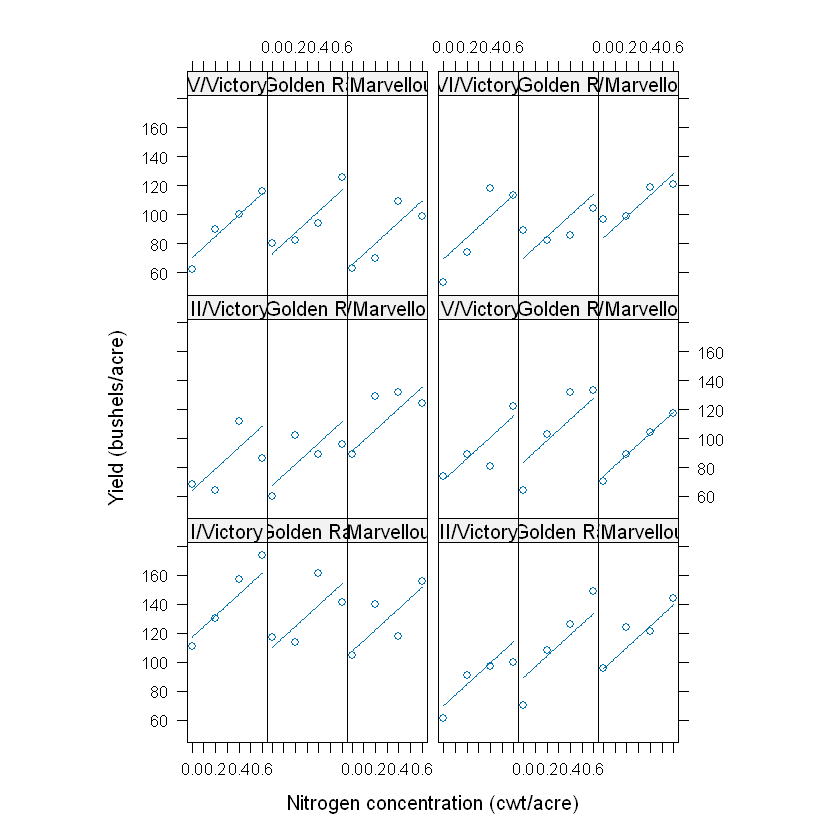

In [8]:
plot( augPred( fm4Oats ), aspect = 2.5, layout = c(6, 3), between = list( x = c(0, 0, 0.5) ) )